<a href="https://colab.research.google.com/github/Shoutaa/Pengolahan-Citra-_UAS/blob/main/Sobel_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

Tujuan: Menghubungkan Google Drive ke Google Colab agar data (gambar) yang tersimpan di Google Drive dapat diakses langsung dari Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

1. cv2 (OpenCV) → Untuk membaca, memproses, dan menganalisis gambar.
2. numpy → Untuk operasi numerik seperti perhitungan piksel dan array gambar.
3. os → Untuk menangani file dan direktori dalam sistem.
4. matplotlib.pyplot → Untuk menampilkan gambar dalam bentuk grafik.

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


# Fungsi Preprocessing Gambar

1. cv2.imread: Membaca gambar dari path.
2. cv2.cvtColor: Mengonversi gambar ke grayscale.
3. cv2.resize: Mengubah ukuran gambar sesuai target size.
4. cv2.threshold: Menghasilkan citra biner berdasarkan threshold.

In [6]:
# Fungsi untuk membaca gambar, melakukan pra-pemrosesan, dan normalisasi ukuran
def preprocess_image(image_path, target_size=(256, 256)):
    image = cv2.imread(image_path)  # Membaca gambar
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Mengonversi gambar ke grayscale
    resized_image = cv2.resize(gray_image, target_size)  # Mengubah ukuran gambar
    _, binary_image = cv2.threshold(resized_image, 127, 255, cv2.THRESH_BINARY)  # Mengubah menjadi gambar biner
    return resized_image, binary_image


# Deteksi Tepi dengan Sobel

1. cv2.Sobel: Mengaplikasikan operator Sobel di arah X dan Y untuk mendeteksi tepi.
2. cv2.magnitude: Menghitung magnitudo atau kekuatan tepi berdasarkan hasil Sobel pada kedua arah.

In [7]:
# Fungsi untuk deteksi tepi menggunakan Sobel
def sobel_edge_detection(binary_image):
    sobel_x = cv2.Sobel(binary_image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel di arah X
    sobel_y = cv2.Sobel(binary_image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel di arah Y
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)  # Menghitung magnitudo dari kedua arah
    sobel_edges = np.uint8(sobel_edges)  # Mengonversi ke tipe data uint8
    return sobel_edges


# Menyimpan Gambar

Fungsi ini digunakan untuk menyimpan hasil deteksi tepi ke folder output.

In [8]:
# Fungsi untuk menyimpan gambar hasil deteksi tepi
def save_image(output_folder, ref_img_name, test_img_name, edge_image):
    if not os.path.exists(output_folder):  # Mengecek apakah folder output sudah ada
        os.makedirs(output_folder)  # Jika belum, buat folder
    output_path = os.path.join(output_folder, f"sobel_{ref_img_name}_with_{test_img_name}.jpg")  # Menentukan path output
    cv2.imwrite(output_path, edge_image)  # Menyimpan gambar


# Menghitung Akurasi

1. ref_image == test_image: Membandingkan setiap piksel gambar referensi dan gambar uji.
2. np.sum(): Menghitung jumlah piksel yang cocok.
3. accuracy: Persentase kesesuaian piksel antara gambar referensi dan uji.

In [9]:
# Fungsi untuk menghitung akurasi berdasarkan perbandingan piksel
def calculate_accuracy(ref_image, test_image):
    matching_pixels = np.sum(ref_image == test_image)  # Menghitung jumlah piksel yang cocok
    total_pixels = ref_image.size  # Menghitung jumlah total piksel
    accuracy = (matching_pixels / total_pixels) * 100  # Menghitung persentase akurasi
    return accuracy


# Perbandingan Gambar dan Visualisasi

Bagian utama yang membandingkan gambar referensi dengan gambar uji dan menampilkan hasilnya.

1. os.makedirs(output_folder, exist_ok=True): Membuat folder untuk menyimpan hasil output.
2. os.listdir(reference_folder): Menyaring gambar dari folder referensi dan uji.
3. zip(): Mengiterasi gambar referensi dan gambar uji secara bersamaan.
4. cv2.imwrite(output_path, test_edges): Menyimpan gambar hasil deteksi tepi.
5. plt.imshow(): Menampilkan visualisasi gambar.

In [10]:
# Menyusun gambar dari folder yang diberikan
def compare_images(reference_folder, test_folder, output_folder):
    reference_images = sorted([os.path.join(reference_folder, f) for f in os.listdir(reference_folder) if f.endswith('.jpg')])  # Membaca file gambar referensi
    test_images = sorted([os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.endswith('.jpg')])  # Membaca file gambar uji

    accuracies = []  # Menyimpan akurasi per gambar
    for ref_img, test_img in zip(reference_images, test_images):
        ref_gray, ref_binary = preprocess_image(ref_img)  # Memproses gambar referensi
        test_gray, test_binary = preprocess_image(test_img)  # Memproses gambar uji

        ref_edges = sobel_edge_detection(ref_binary)  # Deteksi tepi pada gambar referensi
        test_edges = sobel_edge_detection(test_binary)  # Deteksi tepi pada gambar uji

        accuracy = calculate_accuracy(ref_edges, test_edges)  # Menghitung akurasi
        accuracies.append(accuracy)

        print(f'Akurasi antara {os.path.basename(ref_img)} dan {os.path.basename(test_img)}: {accuracy:.2f}%')

        save_image(output_folder, os.path.basename(ref_img), os.path.basename(test_img), test_edges)  # Menyimpan gambar hasil

        # Menampilkan gambar untuk analisis
        plt.figure(figsize=(8, 5))
        plt.subplot(2, 2, 1)
        plt.title(f'Referensi (Gray)')
        plt.imshow(ref_gray, cmap='gray')
        plt.axis("off")

        plt.subplot(2, 2, 2)
        plt.title(f'Uji (Gray)')
        plt.imshow(test_gray, cmap='gray')
        plt.axis("off")

        plt.subplot(2, 2, 3)
        plt.title(f'Referensi (Edges)')
        plt.imshow(ref_edges, cmap='gray')
        plt.axis("off")

        plt.subplot(2, 2, 4)
        plt.title(f'Uji (Edges)')
        plt.imshow(test_edges, cmap='gray')
        plt.axis("off")

        plt.tight_layout()
        plt.show()

    average_accuracy = np.mean(accuracies)  # Menghitung rata-rata akurasi
    print(f'Rata-rata Akurasi: {average_accuracy:.2f}%')


# Menjalankan Fungsi

1. reference_folder dan test_folder adalah path tempat gambar referensi dan uji disimpan.
2. output_folder adalah tempat untuk menyimpan hasil deteksi tepi.

Akurasi antara Alexandra Daddario_28.jpg dan Alexandra Daddario_13.jpg: 85.73%


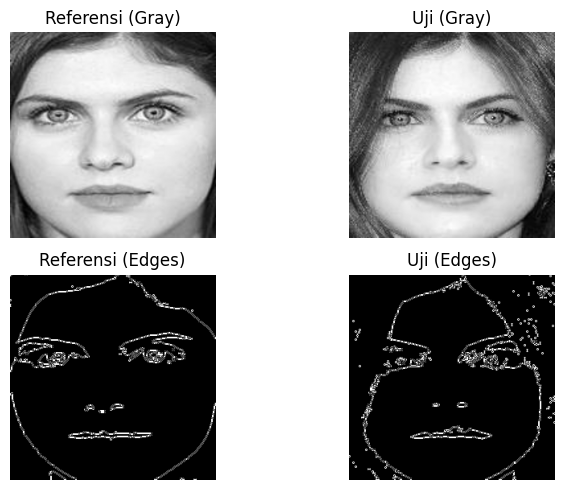

Akurasi antara Andy Samberg_39.jpg dan Andy Samberg_39.jpg: 100.00%


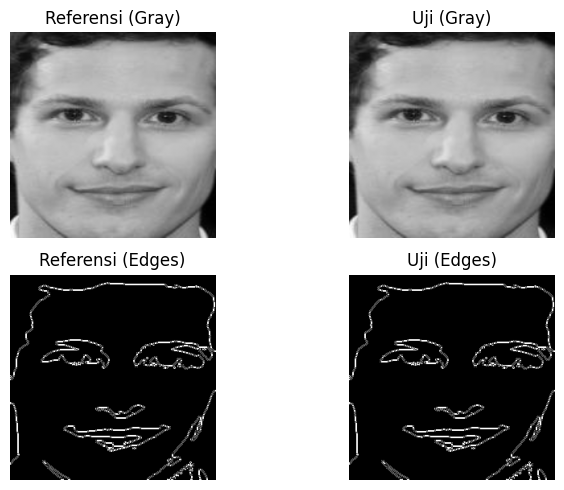

Akurasi antara Billie Eilish_41.jpg dan Billie Eilish_41.jpg: 100.00%


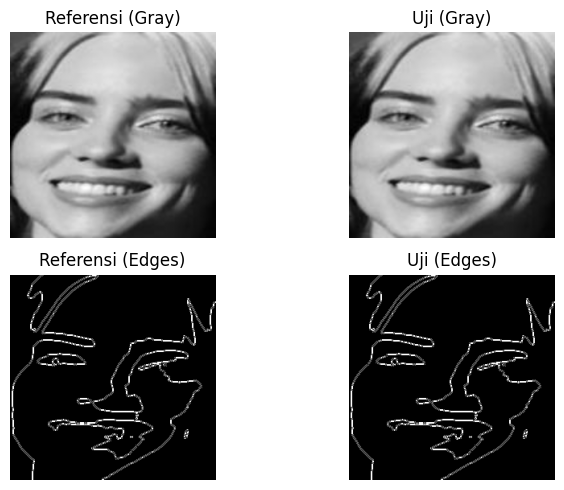

Akurasi antara Brad Pitt_16.jpg dan Brad Pitt_16.jpg: 100.00%


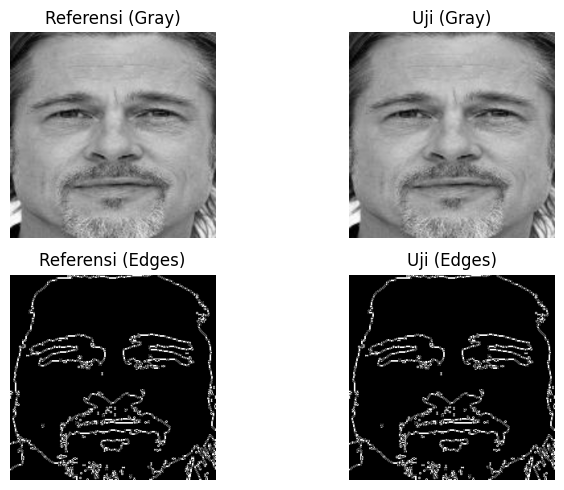

Akurasi antara Camila Cabello_3.jpg dan Camila Cabello_3.jpg: 100.00%


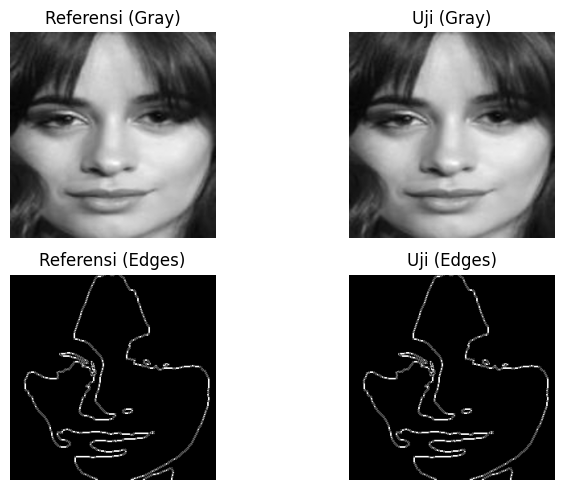

Akurasi antara Claire Holt_17.jpg dan Claire Holt_17.jpg: 100.00%


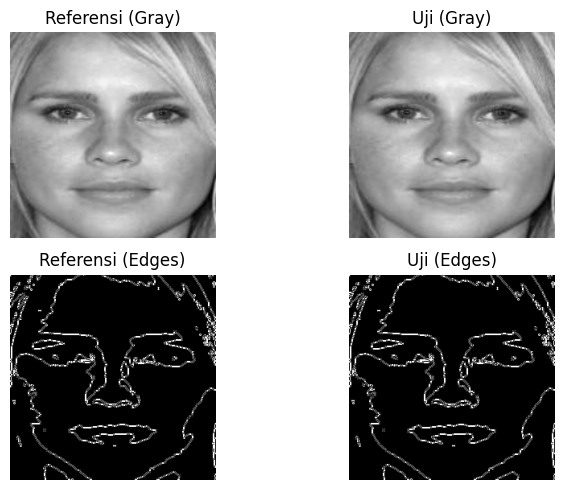

Akurasi antara Courtney Cox_24.jpg dan Courtney Cox_24.jpg: 100.00%


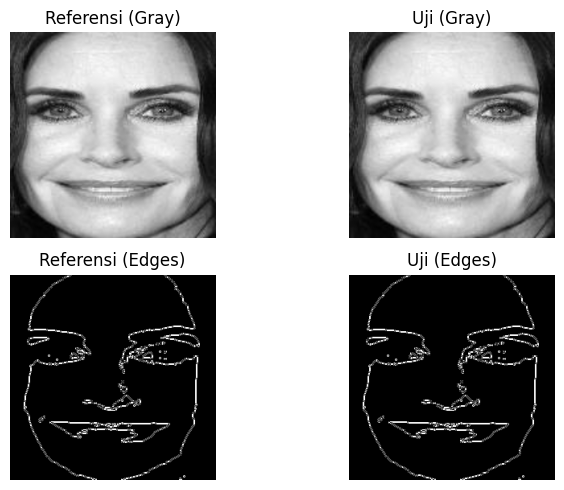

Akurasi antara Dwayne Johnson_33.jpg dan Dwayne Johnson_33.jpg: 100.00%


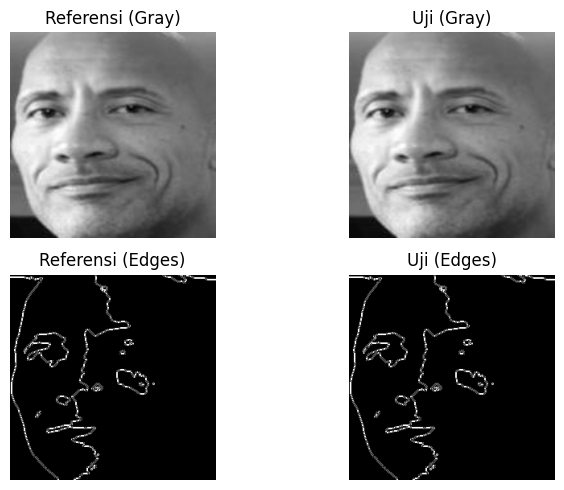

Akurasi antara Elizabeth Olsen_20.jpg dan Elizabeth Olsen_45.jpg: 85.94%


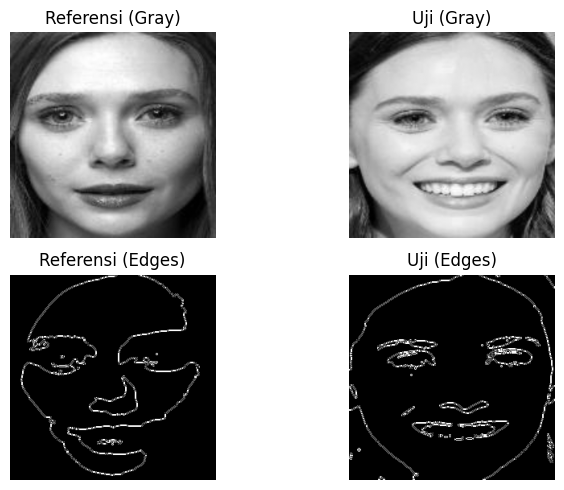

Akurasi antara Ellen Degeneres_1.jpg dan Ellen Degeneres_1.jpg: 100.00%


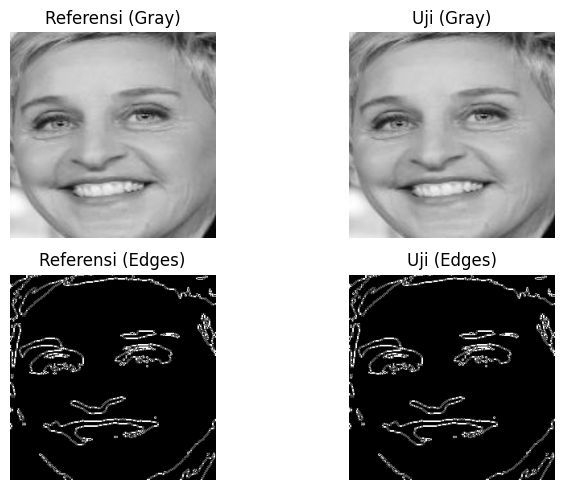

Akurasi antara Henry Cavill_3.jpg dan Henry Cavill_102.jpg: 82.62%


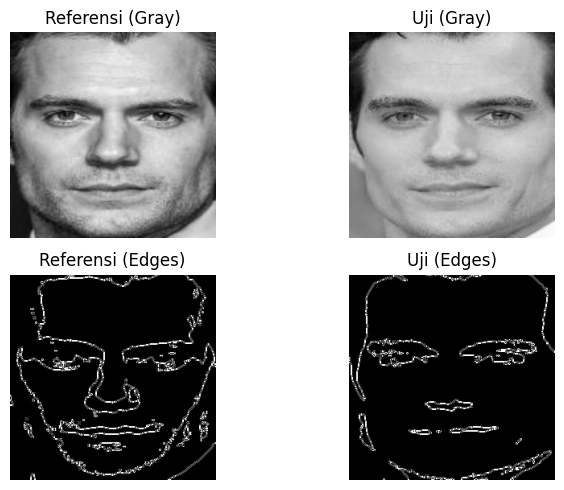

Akurasi antara Hrithik Roshan_10.jpg dan Hrithik Roshan_10.jpg: 100.00%


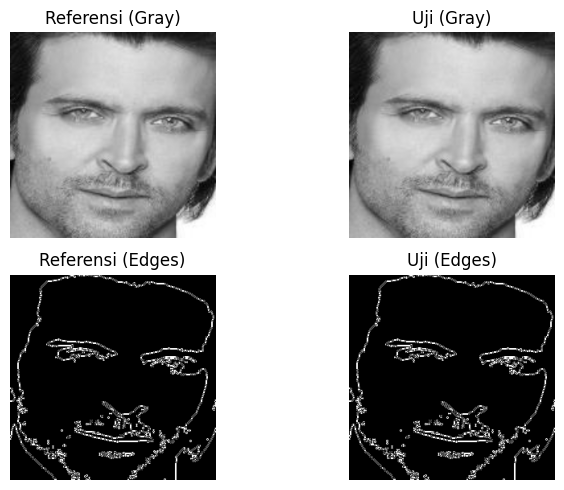

Akurasi antara Hugh Jackman_16.jpg dan Hugh Jackman_100.jpg: 79.17%


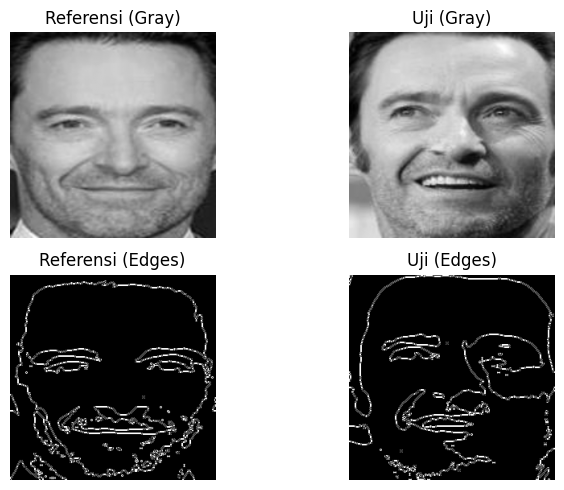

Akurasi antara Jessica Alba_16.jpg dan Jessica Alba_16.jpg: 100.00%


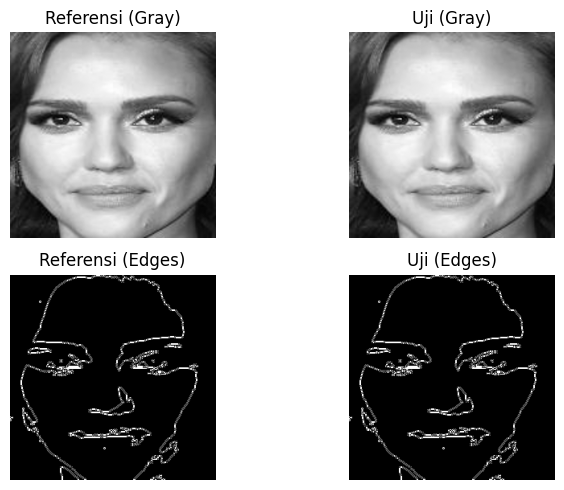

Akurasi antara Lisa Kudrow_16.jpg dan Lisa Kudrow_41.jpg: 79.45%


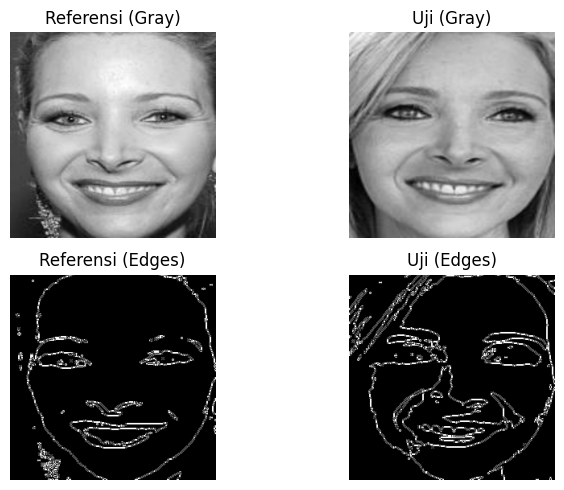

Akurasi antara Margot Robbie_20.jpg dan Margot Robbie_20.jpg: 100.00%


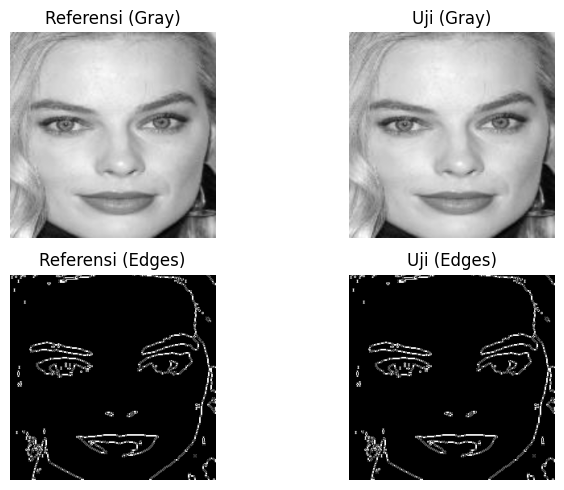

Akurasi antara Natalie Portman_29.jpg dan Natalie Portman_29.jpg: 100.00%


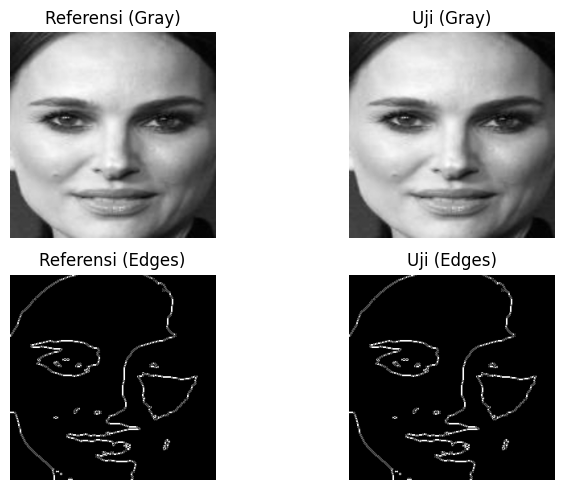

Akurasi antara Robert Downey Jr_3.jpg dan Robert Downey Jr_27.jpg: 80.52%


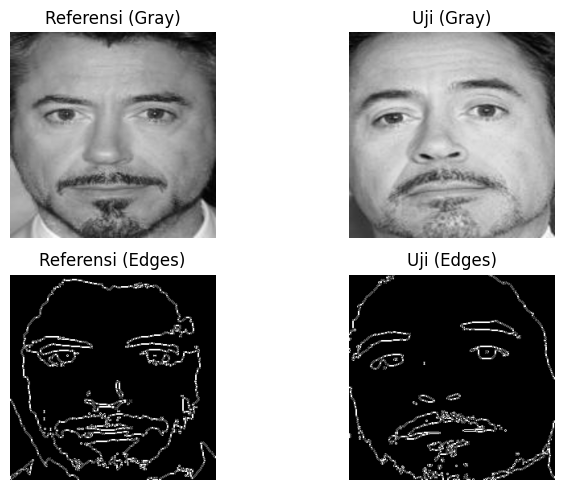

Akurasi antara Tom Cruise_31.jpg dan Tom Cruise_14.jpg: 82.28%


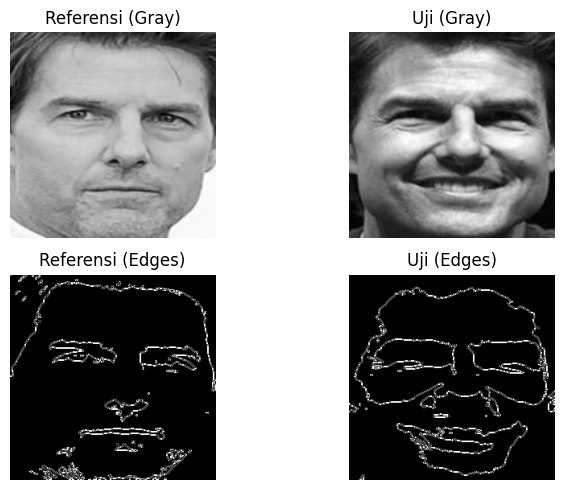

Akurasi antara Zac Efron_10.jpg dan Zac Efron_10.jpg: 100.00%


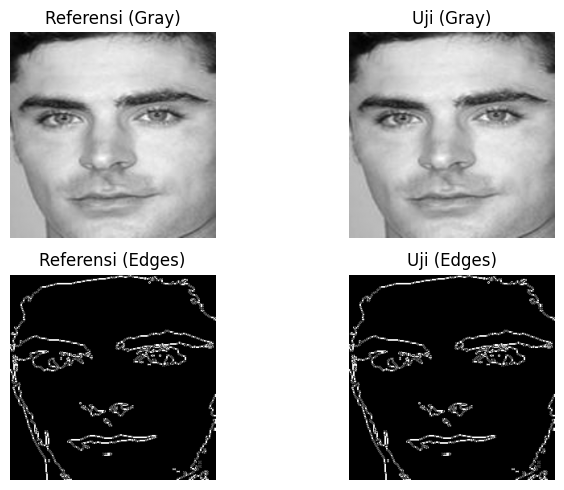

Rata-rata Akurasi: 93.79%


In [11]:
# Path folder referensi dan gambar uji
reference_folder = "/content/drive/MyDrive/SEMESTER 5/Pengolahan CItra Digital/TB/referensi gambar"
test_folder = "/content/drive/MyDrive/SEMESTER 5/Pengolahan CItra Digital/TB/test gambar"
output_folder = "/content/drive/MyDrive/SEMESTER 5/Pengolahan CItra Digital/TB/sobel_output"

# Menjalankan fungsi perbandingan
compare_images(reference_folder, test_folder, output_folder)
